<a href="https://colab.research.google.com/github/dvisionst/titanic_dataset_core/blob/main/Titanic_Dataset_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Dataset Core
- Jose Flores
- 06/29/2022

In [66]:
import pandas as pd
import numpy as np


## 1. Display the head of the dataframe.

In [67]:
# 1. Display the head of the dataframe.
data = '/content/titanic.csv'
titanic_df = pd.read_csv(data)
print(len(titanic_df))
titanic_df.head()


891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. What is the percentage of people who survived? (hint: find the mean of the survival column).

In [68]:
# 2. What is the percentage of people who survived? 
# (hint: find the mean of the survival column).

survival_percentage = titanic_df['Survived'].mean().round(2)*100
f"{survival_percentage}%"


'38.0%'

## 3. How many of each sex survived?

In [69]:
# 3. How many of each sex survived?

# creating a survived filter
survived_filter = titanic_df['Survived'] == 1 
# creating a survived df in order to use value_counts method for answer
titanic_sur_df = titanic_df[survived_filter] 
titanic_sur_df['Sex'].value_counts()

# Answer: There were 233 females that survied and 109 males that survived.

female    233
male      109
Name: Sex, dtype: int64

## 4. Considering only the group of passengers who paid less than $10, what percentage of this group survived? Hint: You can filter the dataframe based on the fare, and then use value_counts(normalize = True) on the "Survived" column to obtain proportions instead of sums. For example 0.25 would indicate 25%

In [70]:
# 4. Considering only the group of passengers who paid less than $10, what 
# percentage of this group survived? Hint: You can filter the dataframe based 
# on the fare, and then use value_counts(normalize = True) on the "Survived" 
# column to obtain proportions instead of sums. 
#For example 0.25 would indicate 25%

# creating df for  Far < $10 by applying the filter condition to survived df
less_10_df = titanic_sur_df[titanic_df['Fare'] < 10]  

# percentage math by using length of Fare < $10 and original df
pct = round(len(less_10_df)/len(titanic_df), 3)*100
pct

# Answer: From the group that paid less than $10, ther were approx 19.6% that
# survived. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


7.5

## 5. Overall, what is the average age of those who didn't survive?

In [71]:

# 5. Overall, what is the average age of those who didn't survive?

died_df = titanic_df[titanic_df['Survived'] == 0]
average_age_of_dead = died_df['Age'].mean().round(2)
average_age_of_dead

30.63

## 6. Overall, what is the average age of those who did survive?

In [72]:
# 6. Overall, what is the average age of those who did survive?

average_age_of_not_dead = titanic_sur_df['Age'].mean().round(2)
average_age_of_not_dead

28.34

## 7. What is the average age of those who did and didn't survive grouped by Sex?

In [73]:
# 7. What is the average age of those who did and didn't survive grouped by Sex?
titanic_df.groupby(['Survived', 'Sex'])['Age'].mean().round(2)

Survived  Sex   
0         female    25.05
          male      31.62
1         female    28.85
          male      27.28
Name: Age, dtype: float64

# Final Thoughts

Looking through the questions and the values obtained, it was a super rough going for poor people. The 19.6% survival percentage of the passengers that paid less than $10 for Fare was truly eye-popping. In terms of survival by gender it 233 females survived as opposed to 109 males. Taking into account context of the time, it makes sense as females were higher in evacuation priority. When looking at the average age of the survivors and non-survivors the data shows that the younger people were more likely to survive.

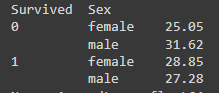

 The average age of survivors was lower than the non-survivors. One can assume that the evacuation priority for children skwed the survival median age to be lower. Also to not is that older passengers not having the stamina to endure the aftermath of the sinking before the full rescue, made them more at risk to pass. 